# Cleaning and preparing the data

The objectives of this notebook are
- 'See' the data available
- Nowcast the consumption data by the PIP (poverty and inequality database by the worldbank)

Specifically the outputs and goals are 
1. Load variables from the PIP and the World Bank Development Indicators
2. Clean and extend them
3. Finalize a dataframe of 150 countries roughly with all its parameters for a global climate-constrained convergence model

## First step is to load PIP itself

In [1]:
'''This notebook converts the data from the PIP survey into a format that is easier to work with for modelling purposes.
The goal is to have an easy to handle but comprehensive dataframe that contains all necessary parameters for a global model of income convergence with emissions.
this notebook heavily draws from the folder data/pip_all_data which contains all data from the PIP survey in the original format.'''

# load all pip data and analyse
import os
import pandas as pd
import numpy as np

# load all data from pip which is in this file path and subfolders

file_path = os.path.join('.', 'data/pip_all_data', 'pip.csv')

# load data into pandas dataframe
pip_data = pd.read_csv(file_path)


# find all unique values in the column "country_code" and count them
country_codes = pip_data['country_code'].unique()
print(country_codes)
print(len(country_codes))

# find all unique values in the column "survey year" and count them but subject to the condition that if a value has decimal value after . then cut this off and count only the integer value
survey_years = pip_data['survey_year'].unique()
print(survey_years) # this shows that there are some values with decimal values after . so we need to cut them off
survey_years = pip_data['survey_year'].astype(int).unique()
print(survey_years)
print(len(survey_years))

# clean the data such that the column "survey_year" only contains integer values
pip_data['survey_year'] = pip_data['survey_year'].astype(int)

# now count how often the value 2018 appears by looping over the column "survey_year" and counting how often the value 2018 appears in this column and also count if there is a value with decimal 
count = 0   
for year in pip_data['survey_year']:
    if int(year) == 2018:
        count += 1
print(count)


['AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CYP' 'CZE'
 'DEU' 'DJI' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN' 'FJI'
 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GRC' 'GTM' 'GUY'
 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KIR' 'KOR' 'LAO' 'LBN' 'LBR' 'LCA'
 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER'
 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NRU' 'PAK' 'PAN' 'PER' 'PHL' 'PNG' 'POL'
 'PRT' 'PRY' 'PSE' 'ROU' 'RUS' 'RWA' 'SDN' 'SEN' 'SLB' 'SLE' 'SLV' 'SRB'
 'SSD' 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC' 'SYR' 'TCD' 'TGO' 'THA'
 'TJK' 'TKM' 'TLS' 'TON' 'TTO' 'TUN' 'TUR' 'TUV' 'TWN' 'TZA' 'UGA' 'UKR'
 'URY' 'USA' 'UZB' 'VEN' 'VNM' 'VUT' 'WSM' 'XKX' 'Y

## Check which countries can be actually used well based on data availability

In [2]:
# find all countries for which there is data for the year 2018 and if there is no data for 2018 then which is the next year for which data is available
# loop over all countries and check if there is data for 2018 and make a dictionary indicating which is the most recent year with data availability
# Find all countries for which there is data for the year 2018,
# and if there is no data for 2018, then find the next year for which data is available.
country_year_available = {}

for country in country_codes:
    # Filter the dataframe for the specific country
    country_data = pip_data[pip_data['country_code'] == country]

    # Iterate over the years in descending order
    for year in sorted(survey_years, reverse=True):
        # Check if there is data for the current year
        if len(country_data[country_data['survey_year'] == year]) > 0:
            country_year_available[country] = year
            break  # Stop as soon as data is found for a year

print(country_year_available)

# store the dict country_year_available as a csv file
country_year_available_df = pd.DataFrame.from_dict(country_year_available, orient='index')
print(country_year_available_df)
# the path should be the file path from above but with the file name country_year_available.csv
country_year_available_df.to_csv('./data/pip_all_data/country_year_available.csv')

{'AGO': 2018, 'ALB': 2020, 'ARE': 2018, 'ARG': 2021, 'ARM': 2021, 'AUS': 2018, 'AUT': 2020, 'AZE': 2005, 'BDI': 2013, 'BEL': 2020, 'BEN': 2018, 'BFA': 2018, 'BGD': 2022, 'BGR': 2020, 'BIH': 2011, 'BLR': 2020, 'BLZ': 1999, 'BOL': 2021, 'BRA': 2021, 'BTN': 2022, 'BWA': 2015, 'CAF': 2021, 'CAN': 2019, 'CHE': 2018, 'CHL': 2020, 'CHN': 2020, 'CIV': 2018, 'CMR': 2014, 'COD': 2012, 'COG': 2011, 'COL': 2021, 'COM': 2014, 'CPV': 2015, 'CRI': 2022, 'CYP': 2020, 'CZE': 2020, 'DEU': 2019, 'DJI': 2017, 'DNK': 2020, 'DOM': 2021, 'DZA': 2011, 'ECU': 2022, 'EGY': 2019, 'ESP': 2020, 'EST': 2020, 'ETH': 2015, 'FIN': 2020, 'FJI': 2019, 'FRA': 2020, 'FSM': 2013, 'GAB': 2017, 'GBR': 2020, 'GEO': 2021, 'GHA': 2016, 'GIN': 2018, 'GMB': 2020, 'GNB': 2018, 'GRC': 2020, 'GTM': 2014, 'GUY': 1998, 'HND': 2019, 'HRV': 2020, 'HTI': 2012, 'HUN': 2020, 'IDN': 2022, 'IND': 2021, 'IRL': 2020, 'IRN': 2019, 'IRQ': 2012, 'ISL': 2017, 'ISR': 2018, 'ITA': 2020, 'JAM': 2004, 'JOR': 2010, 'JPN': 2013, 'KAZ': 2018, 'KEN': 2021

In [3]:
# find all countries for which there is data for the year 2018 and if there is no data for 2018 then which is the next year for which data is available
# loop over all countries and check if there is data for 2018 and make a dictionary indicating which is the most recent year with data availability
# Find all countries for which there is data for the year 2018,
# and if there is no data for 2018, then find the next year for which data is available.
# also make sure the welfare type is properly considered based on the following rule
# use income only if there is no consumption data available and only if the consumption is three or more years older than the income data

# Assuming pip_data and country_codes are already defined
# Assuming survey_years is a list of years in the dataset

# Initialize an empty DataFrame for country_year_available
country_year_available = pd.DataFrame(columns=['country', 'year', 'welfare_type'])

for country in country_codes:
    # Filter the dataframe for the specific country
    country_data = pip_data[pip_data['country_code'] == country]

    # Initialize variables to store the latest year for each welfare type
    latest_year_consumption = None
    latest_year_income = None

    # Iterate over the years in descending order for each welfare type
    for year in sorted(survey_years, reverse=True):
        # Check for consumption data
        if len(country_data[(country_data['survey_year'] == year) & (country_data['welfare_type'] == 'consumption')]) > 0:
            latest_year_consumption = year
            break

    for year in sorted(survey_years, reverse=True):
        # Check for income data
        if len(country_data[(country_data['survey_year'] == year) & (country_data['welfare_type'] == 'income')]) > 0:
            latest_year_income = year
            break

    # Determine which year to use based on the availability and comparison of welfare types
    if latest_year_consumption is not None and (latest_year_income is None or latest_year_consumption >= latest_year_income - 3):
        new_row = pd.DataFrame({'country': [country], 'year': [latest_year_consumption], 'welfare_type': ['consumption']})
        country_year_available = pd.concat([country_year_available, new_row], ignore_index=True)
    elif latest_year_income is not None:
        new_row = pd.DataFrame({'country': [country], 'year': [latest_year_income], 'welfare_type': ['income']})
        country_year_available = pd.concat([country_year_available, new_row], ignore_index=True)

# Output the results
print(country_year_available)

# Store the DataFrame as a csv file
country_year_available.to_csv('./data/pip_all_data/country_year_available.csv', index=False)

    country  year welfare_type
0       AGO  2018  consumption
1       ALB  2020  consumption
2       ARE  2018       income
3       ARG  2021       income
4       ARM  2021  consumption
..      ...   ...          ...
163     XKX  2017  consumption
164     YEM  2014  consumption
165     ZAF  2014  consumption
166     ZMB  2015  consumption
167     ZWE  2019  consumption

[168 rows x 3 columns]


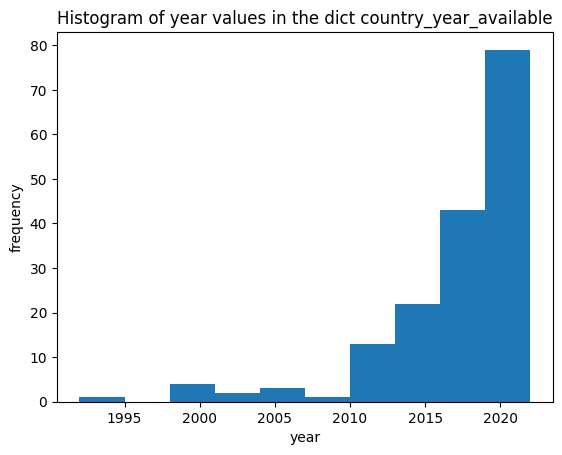

In [4]:
# plot histogram of the year values in the dataframe country_year_available year column including correct axes labelling
import matplotlib.pyplot as plt
plt.hist(country_year_available['year'])
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Histogram of year values in the dict country_year_available')
plt.show()

### Discard all countries with data that is too old i.e. older than 2010

In [5]:
# now make# Assuming country_year_available is already populated with data
# Create a list of countries where the year in the 'year' column is greater than 2010 that is discard all countries with data older than 2010
countries_with_new_data = [row['country'] for index, row in country_year_available.iterrows() if row['year'] > 2010]

print(countries_with_new_data)  # List of countries with data newer than 2010
print(len(countries_with_new_data))  # Number of countries with data newer than 2010

# store this list as a csv file
countries_with_new_data_df = pd.DataFrame(countries_with_new_data)
print(countries_with_new_data_df)
# the path should be the file path from above but with the file name countries_with_new_data.csv
countries_with_new_data_df.to_csv('./data/pip_all_data/countries_with_new_data.csv')


['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'LAO', 'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NRU', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SLB', 'SLE', 'SLV', 'SRB', 'SSD', 'STP', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC', 'TCD', 'TGO', 'THA', 'TJK', 'TLS', 'TON', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA'

In [6]:
# now subset all data for the countries in the list countries_with_new_data and their latest available year based on the dictionar country year available
# and the correctly chosen welfare type and store as a dataframe
# Assuming country_year_available is already populated with data
# Create a list of countries with data newer than 2010
countries_with_new_data = [row['country'] for index, row in country_year_available.iterrows() if row['year'] > 2010]

# Convert country_year_available DataFrame into a dictionary for mapping
# The dictionary will have country codes as keys and tuples of (year, welfare_type) as values
country_year_welfare_mapping = {row['country']: (row['year'], row['welfare_type']) for index, row in country_year_available.iterrows()}

# Subset all data for the countries in countries_with_new_data and their latest available year and welfare type
subset_pip_data = pip_data[
    (pip_data['country_code'].isin(countries_with_new_data)) &
    (pip_data['survey_year'] == pip_data['country_code'].apply(lambda x: country_year_welfare_mapping.get(x, (None, None))[0])) &
    (pip_data['welfare_type'] == pip_data['country_code'].apply(lambda x: country_year_welfare_mapping.get(x, (None, None))[1]))
]

print(subset_pip_data)
print(len(subset_pip_data))

# based on column reporting level in subset_pip_data throw out all rows that are not "national"" and store as a dataframe
# Assuming subset_pip_data is already populated with data
national_subset_pip_data = subset_pip_data[subset_pip_data['reporting_level'] == 'national']

# store the dataframe subset_pip_data as a csv file
national_subset_pip_data.to_csv('./data/pip_all_data/national_subset_pip_data.csv')

# argentina does not appear in the final subset of the data because it does not have any national level data

                      region_name region_code          country_name  \
2              Sub-Saharan Africa         SSA                Angola   
17          Europe & Central Asia         ECA               Albania   
19    Other High Income Countries         OHI  United Arab Emirates   
52      Latin America & Caribbean         LAC             Argentina   
75          Europe & Central Asia         ECA               Armenia   
...                           ...         ...                   ...   
2367        Europe & Central Asia         ECA                Kosovo   
2370   Middle East & North Africa         MNA           Yemen, Rep.   
2376           Sub-Saharan Africa         SSA          South Africa   
2385           Sub-Saharan Africa         SSA                Zambia   
2388           Sub-Saharan Africa         SSA              Zimbabwe   

     country_code  reporting_year reporting_level survey_acronym  \
2             AGO            2018        national          IDREA   
17         

### Subset only the necessary variables

In [7]:
# reload dataframe national_subset_pip_data from csv file and store in new dataframe call data_modified
data_modified = pd.read_csv('./data/pip_all_data/national_subset_pip_data.csv')

#now kick out all columns except the following columns and store as a dataframe
columns_to_keep = [
    "region_name", "region_code", "country_name", "country_code", 
    "survey_year", "welfare_type", "mean", "median", "gini",
    "decile1", "decile2", "decile3", "decile4", "decile5",
    "decile6", "decile7", "decile8", "decile9", "decile10"
]

data_modified = data_modified[columns_to_keep]


# now delte the country Taiwan with code TWN from the dataframe data_modified since it is not recognised by the world bank data
data_modified = data_modified[data_modified['country_code'] != 'TWN']
# also delete the country code YEM, that is Yemen, since it is not recognised by the world bank data and does not have data outside of the PIP
data_modified = data_modified[data_modified['country_code'] != 'YEM']

# store the dataframe data_modified as a csv file
data_modified.to_csv('./data/pip_all_data/data_modified.csv')


In [8]:
# now load new data gdp_pc_ppp.csv and store as a dataframe
gdp_pc_ppp = pd.read_csv('./data/pip_all_data/gdp_pc_ppp.csv', sep = ";")
print(gdp_pc_ppp)
print(gdp_pc_ppp.columns)

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                        Yemen          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
0    GDP per capita, PPP (constant 2017 internation...  NY.GDP.PCAP.PP.KD   
1    GDP per capita, PPP (constant 2017 internation...  NY.GDP.PCAP.PP.KD   
2    GDP per capita, PPP (constant 2017 internation...  NY.GDP.PCAP.PP.KD   
3    GDP per capita, PPP (constant 2017 internation...  NY.GDP.PCAP.PP.KD   
4    GDP per capita, PPP (

## Get country economic growth rates to nowcast all data to 2022 including the average household consumption

In [9]:
# Assuming 'gdp_pc_ppp' is a DataFrame with country codes as index (rows) and years as columns
# Assuming 'data_modified' contains 'country_code' and 'survey_year'

gr_data = {}

# Ensure the country codes in gdp_pc_ppp are the index
gdp_pc_ppp.set_index('Country Code', inplace=True)

for country_code in data_modified['country_code']:
    # Retrieve the corresponding survey year for the country
    latest_year = data_modified.loc[data_modified['country_code'] == country_code, 'survey_year'].iloc[0]

    if country_code in gdp_pc_ppp.index:
        year = 2022
        while year > latest_year:
            if str(year) in gdp_pc_ppp.columns and str(latest_year) in gdp_pc_ppp.columns:
                initial_value = gdp_pc_ppp.loc[country_code, str(latest_year)]
                final_value = gdp_pc_ppp.loc[country_code, str(year)]

                # Check if final value is not NaN
                if not pd.isna(final_value):
                    num_years = year - latest_year

                    # Calculate GR, avoiding division by zero and NaN values
                    if initial_value > 0 and final_value > 0 and num_years > 0:
                        gr = (final_value / initial_value)
                        gr_data[country_code] = gr  # Convert to percentage
                        break

            year -= 1  # Decrement the year

# Convert the CAGR data into a DataFrame for better visualization
gr_df = pd.DataFrame(list(gr_data.items()), columns=['Country Code', 'GR'])

print(gr_df)

# store the dataframe cagr_df as a csv file
gr_df.to_csv('./data/pip_all_data/gr_df.csv')


    Country Code        GR
0            AGO  0.858623
1            ALB  1.166709
2            ARE  1.047059
3            ARM  1.130254
4            AUS  1.040833
..           ...       ...
138          WSM  0.910895
139          XKX  1.214533
140          ZAF  0.963231
141          ZMB  1.000147
142          ZWE  1.002070

[143 rows x 2 columns]


### Do the nowcasting

In [10]:
# Load data_modified from csv file and store as a dataframe
data_modified = pd.read_csv('./data/pip_all_data/data_modified.csv')
# Load gr_df from csv file and store as a dataframe
gr_df = pd.read_csv('./data/pip_all_data/gr_df.csv')
# Iterate over each row in data_modified
for index, row in data_modified.iterrows():
    country_code = row['country_code']
    mean = row['mean']
    median = row['median']
    print(country_code, mean, median)

    # Find the corresponding growth rate (GR) for the country code in gr_df
    # check also whether country_code exists in gr_df
    if country_code in gr_df['Country Code'].values: 
        gr = gr_df.loc[gr_df['Country Code'] == country_code, 'GR'].values[0]
        print(gr)

        # Adjust the mean and median values by multiplying with the growth rate
        data_modified.at[index, 'mean'] = mean * gr
        data_modified.at[index, 'median'] = median * gr

# Print the updated data_modified dataframe
print(data_modified)
#delete first column in data_modified
data_modified = data_modified.drop(data_modified.columns[[0]], axis=1)
print(data_modified.columns)    
# first save the new dataframe data_modified as a new dataframe data_nowcasted
data_nowcasted = data_modified
# add a new column in data_nowcasted between the columns survey_year and welfare_type and call it nowcasted_year
data_nowcasted.insert(5, 'nowcasted_year', 0)
# set all values in this column to 2022
data_nowcasted['nowcasted_year'] = 2022
print(data_nowcasted.columns)
# store the dataframe data_modified as a csv file but under different name data_nowcasted
data_modified.to_csv('./data/pip_all_data/data_nowcasted.csv')

AGO 5.482150726 3.420550539
0.8586230107528467
ALB 13.95218978 12.06470661
1.1667088749555394
ARE 78.77590282 72.12141495
1.0470593108820714
ARM 7.779151681 6.741889338
1.1302541853778874
AUS 64.60964342 53.05049471
1.040833082359701
AUT 66.33993192 59.10353403
1.0773783406591668
BDI 2.290275519 1.70075649
0.8588033914084812
BEL 58.74781503 53.04003039
1.0868055531414078
BEN 4.658511326 3.481832568
1.129928460181735
BFA 4.284381087 2.883932261
1.052476168979977
BGD 4.941591323 4.039827609
BGR 30.87964727 22.82247518
1.2000440192097068
BIH 21.18461778 17.60119079
1.5308754045482795
BLR 19.26502611 17.2380521
0.992336517957194
BOL 19.54968931 14.91199872
1.023797982189759
BRA 19.17796735 11.59439867
1.02428701800466
BTN 15.75962471 13.86246955
BWA 8.82108724 4.842954987
1.134221930649225
CAF 2.240665199 1.566592566
0.9830459503428068
CAN 65.73275249 56.30329447
0.9959107739422574
CHE 77.10288515 64.34562469
1.0380424513425506
CHL 25.48751316 17.01272501
1.126926472175095
CHN 13.62209667 

## Extend the data via the important variables population and gdp growth rate

In [11]:
# import the data from the world bank data file gdp_pc_ppp.csv and store as a dataframe and from population.csv and store as a dataframe
gdp_pc_ppp = pd.read_csv('./data/pip_all_data/gdp_pc_ppp.csv', sep = ";")
population = pd.read_csv('./data/pip_all_data/population.csv')

# add a new empty column to data_nowcasted called gdp_pc_ppp
data_nowcasted['gdp_pc_ppp_2017'] = 0.0
# add a new empty column to data_nowcasted called population
data_nowcasted['population'] = 0.0
# iterate over all countries in data_nowcasted in the column country_code
for country in data_nowcasted['country_code']:
    print(country)

    # check whether value for 2022 exists in gdp_pc_ppp for this country
    if not np.isnan(gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country]['2022'].values[0]):
        sub_data = float(gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country]['2022'].values[0])
        print(sub_data)
        # if yes then store this value in data_nowcasted in the column gdp_pc_ppp
        data_nowcasted.loc[data_nowcasted['country_code'] == country, 'gdp_pc_ppp_2017'] = sub_data
    else:
        sub_data = float(gdp_pc_ppp[gdp_pc_ppp['Country Code'] == country]['2021'].values[0])
        #print(sub_data)
        # if yes then store this value in data_nowcasted in the column gdp_pc_ppp
        data_nowcasted.loc[data_nowcasted['country_code'] == country, 'gdp_pc_ppp_2017'] = sub_data

    # check whether value for 2022 exists in population for this country
    if not np.isnan(population[population['Country Code'] == country]['2022'].values[0]):
        sub_data = float(population[population['Country Code'] == country]['2022'].values[0])
        # if yes then store this value in data_nowcasted in the column population
        data_nowcasted.loc[data_nowcasted['country_code'] == country, 'population'] = sub_data
    else:
        # find the most recent year for which population data for country is available in population df
        sub_data = float(population[population['Country Code'] == country]['2021'].values[0])
        # if yes then store this value in data_nowcasted in the column population
        data_nowcasted.loc[data_nowcasted['country_code'] == country, 'population'] = sub_data
        

# south sudan there is no data available so set the data based on values from the IMF https://www.imf.org/external/datamapper/profile/SSD
# but since this value is smaller than the value for South Sudan in terms for yearl consumption which is 2.150079634*365 = 784.5
# we set the value for south sudan to 784.5
data_nowcasted.loc[data_nowcasted['country_code'] == 'SSD', 'gdp_pc_ppp_2017'] = 785
# store the dataframe data_nowcasted as a csv file
data_nowcasted.to_csv('./data/pip_all_data/data_nowcasted_extended.csv')

AGO
5906.115677
ALB
15492.0674
ARE
74917.67411
ARM
16057.00646
AUS
51090.26333
AUT
55867.18381
BDI
708.1783134
BEL
53287.15361
BEN
3435.171617
BFA
2158.858516
BGD
6263.004635
BGR
26961.29126
BIH
16737.22601
BLR
19092.11117
BOL
8244.235658
BRA
15093.46512
BTN
BWA
15518.65105
CAF
823.9821853
CAN
48974.58659
CHE
72278.20726
CHL
25886.12136
CHN
18187.84112
CIV
5537.369758
CMR
3723.532337
COD
1073.643271
COG
3700.270102
COL
15616.75222
COM
3245.768697
CPV
7379.247565
CRI
22070.92097
CYP
44996.31641
CZE
41052.64709
DEU
53969.62555
DJI
4989.408723
DNK
59935.11992
DOM
19338.01511
DZA
11198.23348
ECU
10859.21783
EGY
12180.45165
ESP
40223.01254
EST
37711.81883
ETH
2381.165784
FIN
49418.7794
FJI
12388.10853
FRA
45904.4113
FSM
3320.91129
GAB
13939.78681
GBR
47587.16735
GEO
17078.34096
GHA
5480.329983
GIN
2699.128855
GMB
2076.566434
GNB
1855.111973
GRC
31704.42561
GTM
9162.052788
HND
5709.124208
HRV
34302.34882
HTI
2799.112561
HUN
35356.77581
IDN
12409.75885
IND
7112.039396
IRL
112445.421
IRN
15004

## We also compute the trend in carbon intensity from 2010 to 2020 
### and if that is not possible that from a year > 2010 to 2020

In [12]:

# load the dataframe data_nowcasted_extended from csv file
data_nowcasted_extended = pd.read_csv('./data/pip_all_data/data_nowcasted_extended.csv')
# cast all numerical columns in data_nowcasted_extended to float
data_nowcasted_extended = data_nowcasted_extended.astype({'mean': float, 'median': float, 'gini': float, 'decile1': float, 'decile2': float, 'decile3': float, 'decile4': float, 'decile5': float, 'decile6': float, 'decile7': float, 'decile8': float, 'decile9': float, 'decile10': float, 'gdp_pc_ppp_2017': float, 'population': float})
# import the csv carbon_intensity.csv and store as a dataframe
carbon_intensity = pd.read_csv('./data/pip_all_data/carbon_intensity.csv')
# cast all numerical columns in carbon_intensity to float
carbon_intensity = carbon_intensity.astype({'2010': float, '2011': float, '2012': float, '2013': float, '2014': float, '2015': float, '2016': float, '2017': float, '2018': float, '2019': float, '2020': float})
print(carbon_intensity)
# for all countries in data_nowcasted_extended find the corresponding value for carbon intensity in the dataframe carbon_intensity
# for all countries in df carbon_intensity calculate the compound annual growth rate of the carbon intensity 2010-2020
# for all countries in the column country_code in df carbon_intensity calculate the compound annual growth rate of the carbon intensity 2010-2020
# store the compound annual growth rate together with the country code in a dictionary
carbon_intensity_cagr = {}
for country in carbon_intensity["Country Code"]:
    # check the value in the column 2010 and 2020 and calculate the compound annual growth rate
    # check whether value for 2020 exists in carbon_intensity for this country
    if not np.isnan(carbon_intensity[carbon_intensity['Country Code'] == country]['2020'].values[0]):
        sub_data = carbon_intensity[carbon_intensity['Country Code'] == country]['2020'].values[0]
        print(sub_data)
        # if yes then store this value in data_nowcasted in the column gdp_pc_ppp
        carbon_intensity_cagr[country] = float((sub_data / carbon_intensity[carbon_intensity['Country Code'] == country]['2010'].values[0])**(1/10) - 1)
    else:
        print("not the right data available")

# use this dictionary carbon_intensity_cagr to forecast the carbon intensity values for 2021 and 2022 in the carbon_intensity dataframe and store as a new dataframe
for country in carbon_intensity_cagr:
    # check whether value for 2020 exists in carbon_intensity for this country
    if not np.isnan(carbon_intensity[carbon_intensity['Country Code'] == country]['2020'].values[0]):
        sub_data = carbon_intensity[carbon_intensity['Country Code'] == country]['2020'].values[0]
        print(sub_data)
        # if yes then store this value in data_nowcasted in the column gdp_pc_ppp
        carbon_intensity.loc[carbon_intensity['Country Code'] == country, '2021'] = sub_data * (1 + carbon_intensity_cagr[country])
        carbon_intensity.loc[carbon_intensity['Country Code'] == country, '2022'] = sub_data * (1 + carbon_intensity_cagr[country])**2
    else:
        print("not the right data available")

#store the carbon_intensity  now as carbon_intensity_nowcasted.csv
carbon_intensity.to_csv('./data/pip_all_data/carbon_intensity_nowcasted.csv')

# import the csv carbon_intensity_nowcasted.csv' and store as a dataframe
# make new column carbon_intensity in data_nowcasted_extended and fill with the values from carbon_intensity_nowcasted.csv for 2022
carbon_intensity = pd.read_csv('./data/pip_all_data/carbon_intensity_nowcasted.csv')
data_nowcasted_extended['carbon_intensity'] = 0.0
# add another column to data_nowcasted_extended called carbon_intensity_trend
data_nowcasted_extended['carbon_intensity_trend'] = 0.0


# iterate over all countries in data_nowcasted_extended and find the corresponding value for carbon intensity in the dataframe carbon_intensity
for country in data_nowcasted_extended['country_code']:
    # check whether value for 2022 exists in carbon_intensity for this country
    if not np.isnan(carbon_intensity[carbon_intensity['Country Code'] == country]['2022'].values[0]):
        sub_data = float(carbon_intensity[carbon_intensity['Country Code'] == country]['2022'].values[0])
        print(sub_data)
        # if yes then store this value in data_nowcasted in the column gdp_pc_ppp
        data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == country, 'carbon_intensity'] = sub_data
        # set the values in the df data_nowcasted_extended in the column carbon_intensity_trend to the values from the df carbon_intensity_cagr
        data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == country, 'carbon_intensity_trend'] = carbon_intensity_cagr[country]
    else:
        print("not the right data available")


# save again the dataframe data_nowcasted_extended as a csv file
data_nowcasted_extended.to_csv('./data/pip_all_data/data_nowcasted_extended.csv')


                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                               Indicator Name        Indicator Code  1960  \
0    CO2 emissions (kg per 2017 PPP $ of GDP)  EN.ATM.CO2E.PP.GD.KD   NaN   
1    CO2 emissions (kg per 2017 PPP $ of GDP)  EN.ATM.CO2E.PP.GD.KD   NaN   
2    CO2 emissions (kg per 2017 PPP $ of GDP)  EN.ATM.CO2E.PP.GD.KD   NaN   
3    CO2 emissions (kg per 2017 PPP $ of GDP)  EN.ATM.CO2E.PP.GD.KD   NaN   
4    CO2 emissions (kg per

In [13]:
# set extra countries in terms of carbon intensities for which methods above do not work
# South Sudan from OWID https://ourworldindata.org/co2/country/south-sudan
# set south sudan carbon intensity in data_nowcasted_extended to 0.22
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'SSD', 'carbon_intensity'] = 0.22
# set the values in the df data_nowcasted_extended in the column carbon_intensity_trend to 0.1% increase per year
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'SSD', 'carbon_intensity_trend'] = 0.001

# delete dijbouti from data_nowcasted_extended since there is not enough data available and it is rather small
data_nowcasted_extended = data_nowcasted_extended[data_nowcasted_extended['country_code'] != 'DJI']

# for kosovo use the values from serbia since kosovo is not recognised by the world bank and there is not enough data
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'XKX', 'carbon_intensity'] = data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'SRB', 'carbon_intensity'].values[0]
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'XKX', 'carbon_intensity_trend'] = data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'SRB', 'carbon_intensity_trend'].values[0]

# for west bank and gaza use values from lebanon since there is not enough data available even though this is not a perfect match
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'PSE', 'carbon_intensity'] = data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'LBN', 'carbon_intensity'].values[0]
data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'PSE', 'carbon_intensity_trend'] = data_nowcasted_extended.loc[data_nowcasted_extended['country_code'] == 'LBN', 'carbon_intensity_trend'].values[0]

# save again the dataframe data_nowcasted_extended as a csv file
data_nowcasted_extended.to_csv('./data/pip_all_data/data_nowcasted_extended.csv')


### Compute the absolute decile mean household consumption expenditure or income values

In [14]:
# add ten more columns to the data_nowcasted_extended dataframe and call them decile1_abs, decile2_abs, decile3_abs, decile4_abs, decile5_abs, decile6_abs, decile7_abs, decile8_abs, decile9_abs, decile10_abs
# and fill them with the absolute mean household incomes per decile which can be calculated via the formula decile1_abs = (mean*365)*population*decile1*(population/10) where mean and population and decile1 are columns in the dataframe 

# Define a function to calculate the absolute mean household income for a decile
def calculate_decile_abs(row, decile_number):
    mean = row['mean']
    population = row['population']
    decile = row[f'decile{decile_number}']
    return (mean * 365) * decile * 10

# Loop through each decile to add the new columns and calculate their values
for i in range(1, 11):
    decile_col = f'decile{i}'
    abs_decile_col = f'{decile_col}_abs'
    
    # Ensure the decile column exists in the DataFrame
    if decile_col not in data_nowcasted_extended.columns:
        raise KeyError(f"The decile column '{decile_col}' does not exist in the DataFrame.")
    
    # Apply the calculation to each row
    data_nowcasted_extended[abs_decile_col] = data_nowcasted_extended.apply(calculate_decile_abs, axis=1, decile_number=i)


# make sure the first column in data_nowcasted_extended is called index and contains the row numbers
data_nowcasted_extended.index.name = 'index'

# delete the second column
data_nowcasted_extended = data_nowcasted_extended.drop(data_nowcasted_extended.columns[[0]], axis=1)



### Lastly also add a column on the GDP to mean hh income ratio in 2022 as this is a crucial model parameter
#### it is used later on for estimating the size of the entire economy needed to support hh cons. and so important for estimating emissions too

In [15]:
# add another column to data_nowcasted_extended called gdp_to_mean_hh_income_ratio and fill with the values from the column mean divided by the column gdp_pc_ppp_2017
data_nowcasted_extended['gdp_to_mean_hh_income_ratio'] = data_nowcasted_extended['mean']*365 / data_nowcasted_extended['gdp_pc_ppp_2017'] # times 365 to get annual income


# save again the dataframe data_nowcasted_extended as a csv file
data_nowcasted_extended.to_csv('./data/pip_all_data/data_nowcasted_extended.csv')

## We also need to cast an entirely different dataframes that contains the population projections from the UN
#### we just use the medium variant for all countries, that is it

In [16]:
# Load the CSV file
un_pop_projections = pd.read_csv('./data/pip_all_data/un_pop_projections.csv', sep=';', encoding='latin1')

# Remove rows where 'iso3_code' is NaN
un_pop_projections = un_pop_projections[un_pop_projections['iso3_code'].notna()]

# Ensure 'year' is numeric, convert to integer, and filter out invalid years
un_pop_projections['year'] = pd.to_numeric(un_pop_projections['year'], errors='coerce')
un_pop_projections = un_pop_projections.dropna(subset=['year'])  # Drop rows where year conversion failed
un_pop_projections['year'] = un_pop_projections['year'].astype(int)
un_pop_projections = un_pop_projections[(un_pop_projections['year'] >= 2022) & (un_pop_projections['year'] <= 2100)]

# Assuming data_nowcasted_extended is already defined and contains a 'country_code' column
population_projections = pd.DataFrame(index=data_nowcasted_extended['country_code'].unique())
years = list(range(2022, 2101))
population_projections = population_projections.reindex(columns=years, fill_value=0.0)

# Loop over all countries and years to update population projections
for country in population_projections.index:
    for year in years:
        # Find matching rows for current country and year
        sub_data = un_pop_projections[(un_pop_projections['iso3_code'] == country) & (un_pop_projections['year'] == year)]
        if not sub_data.empty:
            # Update population value using the 'total_pop' column
            population_value = float(sub_data['total_pop'].values[0])
            population_projections.at[country, year] = population_value

# Display or further process the population_projections DataFrame as needed
print(population_projections.head())
# store the dataframe population_projections as a csv file
population_projections.to_csv('./data/pip_all_data/population_projections.csv')

           2022        2023        2024        2025        2026        2027  \
AGO  35050000.0  36128000.0  37240000.0  38369000.0  39516000.0  40683000.0   
ALB   2848000.0   2837000.0   2828000.0   2824000.0   2819000.0   2814000.0   
ARE   9403000.0   9479000.0   9555000.0   9629000.0   9702000.0   9772000.0   
ARM   2783000.0   2778000.0   2778000.0   2778000.0   2776000.0   2774000.0   
AUS  26046000.0  26309000.0  26570000.0  26829000.0  27087000.0  27341000.0   

           2028        2029        2030        2031  ...         2091  \
AGO  41867000.0  43071000.0  44291000.0  45532000.0  ...  124665000.0   
ALB   2808000.0   2801000.0   2794000.0   2785000.0  ...    1366000.0   
ARE   9841000.0   9908000.0   9973000.0  10036000.0  ...   13451000.0   
ARM   2771000.0   2767000.0   2762000.0   2757000.0  ...    1790000.0   
AUS  27593000.0  27841000.0  28084000.0  28321000.0  ...   37200000.0   

            2092         2093         2094         2095         2096  \
AGO  125629000

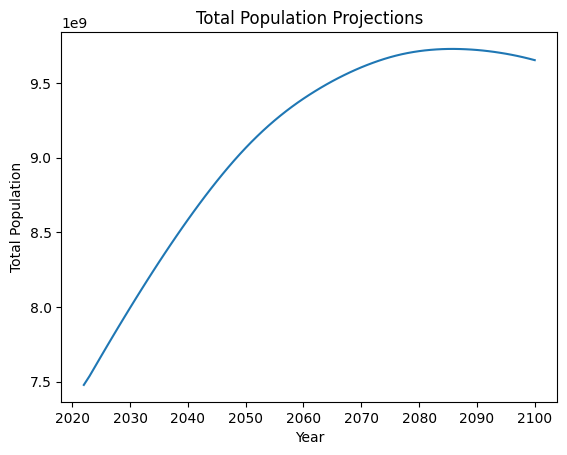

In [17]:
# check the total of all countries in the dataframe population_projections to see whether it makes sense. so sum up all rows and check whether the sum is reasonable
# Sum the population values for each year
total_population = population_projections.sum()
# plot the total population over the years
plt.plot(total_population)
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Projections')
plt.show()

In [18]:
# compare population projection in the year 2022 with the population data in the dataframe data_nowcasted_extended in the column "population" which is also for the year 2022. do they overlap?
# Compare the population projections for 2022 with the population data in data_nowcasted_extended
population_2022_projections = population_projections[2022]
population_2022_nowcasted = data_nowcasted_extended.set_index('country_code')['population']
population_comparison = pd.concat([population_2022_projections, population_2022_nowcasted], axis=1, keys=['Projections', 'Nowcasted'])
print(population_comparison)
# compute the percentage difference between the two values
population_comparison['Difference'] = (population_comparison['Projections'] - population_comparison['Nowcasted']) / population_comparison['Nowcasted'] * 100
# print the percentage difference
print(population_comparison)



     Projections   Nowcasted
AGO   35050000.0  35588987.0
ALB    2848000.0   2777689.0
ARE    9403000.0   9441129.0
ARM    2783000.0   2780469.0
AUS   26046000.0  26005540.0
..           ...         ...
WSM     221000.0    222382.0
XKX    1658000.0   1761985.0
ZAF   59647000.0  59893885.0
ZMB   19746000.0  20017675.0
ZWE   16153000.0  16320537.0

[150 rows x 2 columns]
     Projections   Nowcasted  Difference
AGO   35050000.0  35588987.0   -1.514477
ALB    2848000.0   2777689.0    2.531277
ARE    9403000.0   9441129.0   -0.403861
ARM    2783000.0   2780469.0    0.091028
AUS   26046000.0  26005540.0    0.155582
..           ...         ...         ...
WSM     221000.0    222382.0   -0.621453
XKX    1658000.0   1761985.0   -5.901583
ZAF   59647000.0  59893885.0   -0.412204
ZMB   19746000.0  20017675.0   -1.357176
ZWE   16153000.0  16320537.0   -1.026541

[150 rows x 3 columns]


## Last thing we do is we transform the population projections dataframe in a growthrate per year frame from 2023 to 2100 and save that

In [19]:
# Last thing we do is we transform the population projections dataframe in a growthrate per year frame from 2023 to 2100 and save that
# Create a new DataFrame for population growth rates
population_growth_rates = population_projections.diff(axis=1) / population_projections.shift(axis=1)
# Drop the first column (2022) since it contains NaN values
population_growth_rates = population_growth_rates.drop(columns=2022)
# but then make sure that all the columns from 2023 to 2100 are renamed to 2022 to 2099
population_growth_rates.columns = range(2022, 2100)
# make sure the first column is called code
population_growth_rates.index.name = 'code'
# Save the DataFrame as a CSV file
population_growth_rates.to_csv('./data/pip_all_data/population_growth_rates.csv')